In [2]:
import sys

sys.path.append("../..")

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from emgrep.utils.io import load_mat

In [4]:
mat = load_mat('../../data/01_raw/DB6_s1_a/S1_D1_T1.mat')  # load mat-file

### Data Sets
For each exercise, for each subject, the database contains one matlab file with synchronized variables.
The variables included in the matlab files are:
- subj: subject number
- acc (48 columns): three-axes accelerometers of the 12 electrodes (6 columns are empty)
- emg (16 columns): sEMG signal of the 14 electrodes (2 columns are empty)
- stimulus (1 column): the movement repeated by the subject.
- restimulus (1 column): again the movement repeated by the subject. In this case the duration of the movement label is refined a-posteriori in order to correspond to the real movement
- object (1 column): used object.
- reobject (1 column): relabeled used object.
- repetition (1 column): repetition of the stimulus
- rerepetition (1 column): repetition of restimulus
- repetition object (1 column): used object repetition
- daytesting: day of the acquisition (1 to 5)
- time: time of the acquisition (1 to 2)

In [5]:
emg = mat['emg']
stimulus = mat['stimulus']
restimulus = mat['restimulus']

In [6]:
emg.shape, type(emg)

((1428729, 16), numpy.ndarray)

In [7]:
class_counts = np.unique(restimulus, return_counts=True)
for cls, count in zip(*class_counts):
    print(f'Class {cls:2d}: {count/1000:.0f}k samples ({count/restimulus.shape[0]*100:.2f}%)')

Class  0: 363k samples (25.44%)
Class  1: 152k samples (10.66%)
Class  3: 152k samples (10.63%)
Class  4: 154k samples (10.76%)
Class  6: 149k samples (10.44%)
Class  9: 156k samples (10.91%)
Class 10: 145k samples (10.15%)
Class 11: 158k samples (11.03%)


Each movie lasts five seconds and three seconds of rest are allowed in-between movements. 

/var/folders/vn/89j8g3p55gb71ngxshtbg1r80000gn/T/ipykernel_21451/1043718819.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f"{step / 2000:.1f} s" for step in ax.get_xticks()])


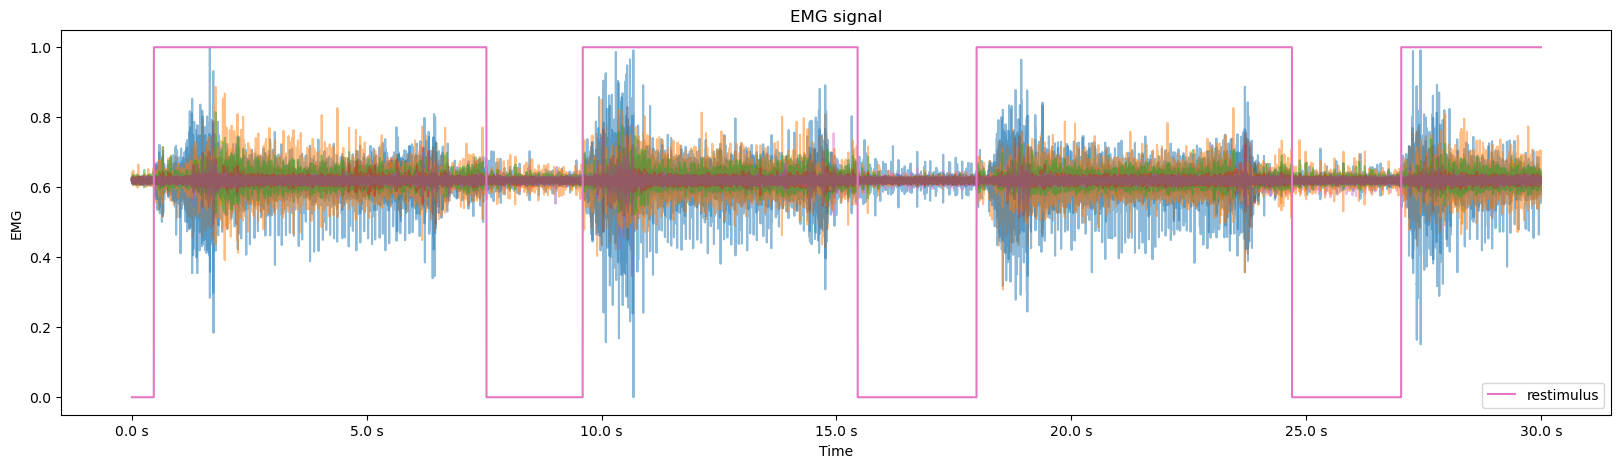

In [8]:
def plot_signal(emg, restimulus, t=60_000, ax=None):
    emg_sample = emg[:t, :]

    # scale to [0, 1]
    emg_sample = (emg_sample - emg_sample.min()) / (emg_sample.max() - emg_sample.min())

    X = np.arange(len(emg_sample))

    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(20, 5))
        
    ax.plot(X, emg_sample, alpha=0.5)
    ax.plot(X, restimulus[:t, 0], label='restimulus')

    ax.set_xticklabels([f"{step / 2000:.1f} s" for step in ax.get_xticks()])

    ax.set_xlabel('Time')
    ax.set_ylabel('EMG')
    ax.set_title('EMG signal')


    ax.legend(loc='lower right')

    if ax is None:
        plt.show()


plot_signal(emg, restimulus)

sampling rate: 2 kHz

/var/folders/vn/89j8g3p55gb71ngxshtbg1r80000gn/T/ipykernel_21451/3924337556.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f"{step / 2000:.1f} s" for step in ax.get_xticks()])


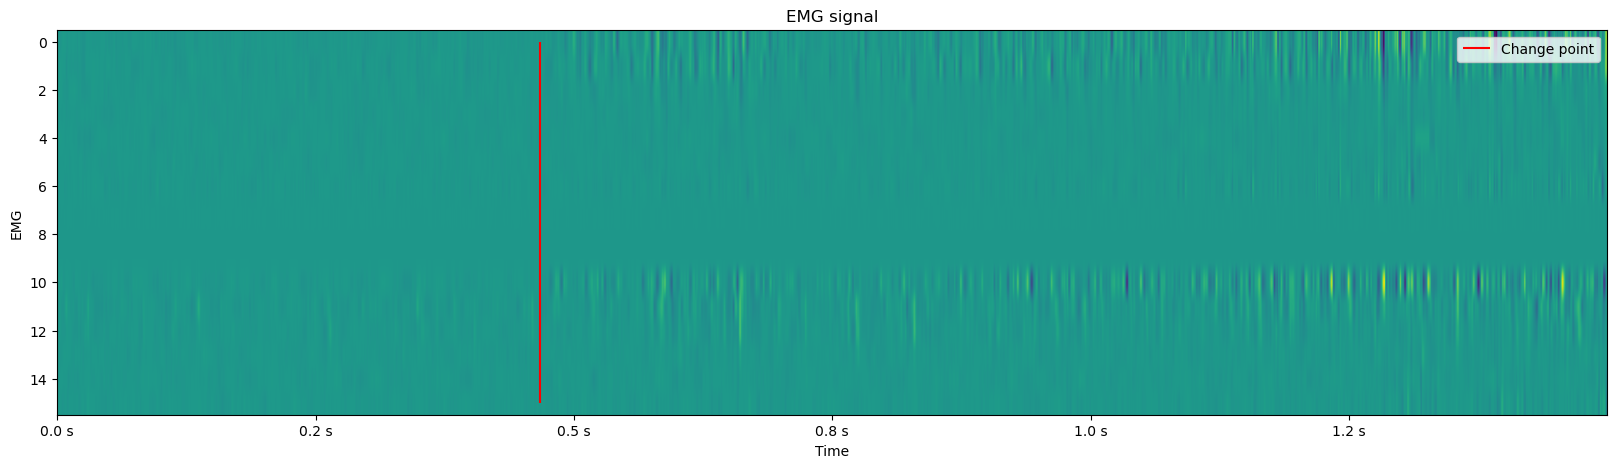

In [9]:
t = 3000

change_point = np.argmax(restimulus[:t, :])

fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.imshow(emg[:t, :].T, aspect='auto')
ax.vlines(change_point, 0, 15, color='red', label='Change point')

ax.set_xticklabels([f"{step / 2000:.1f} s" for step in ax.get_xticks()])

ax.set_xlabel('Time')
ax.set_ylabel('EMG')
ax.set_title('EMG signal')

ax.legend()
plt.show()

/var/folders/vn/89j8g3p55gb71ngxshtbg1r80000gn/T/ipykernel_21451/1043718819.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f"{step / 2000:.1f} s" for step in ax.get_xticks()])


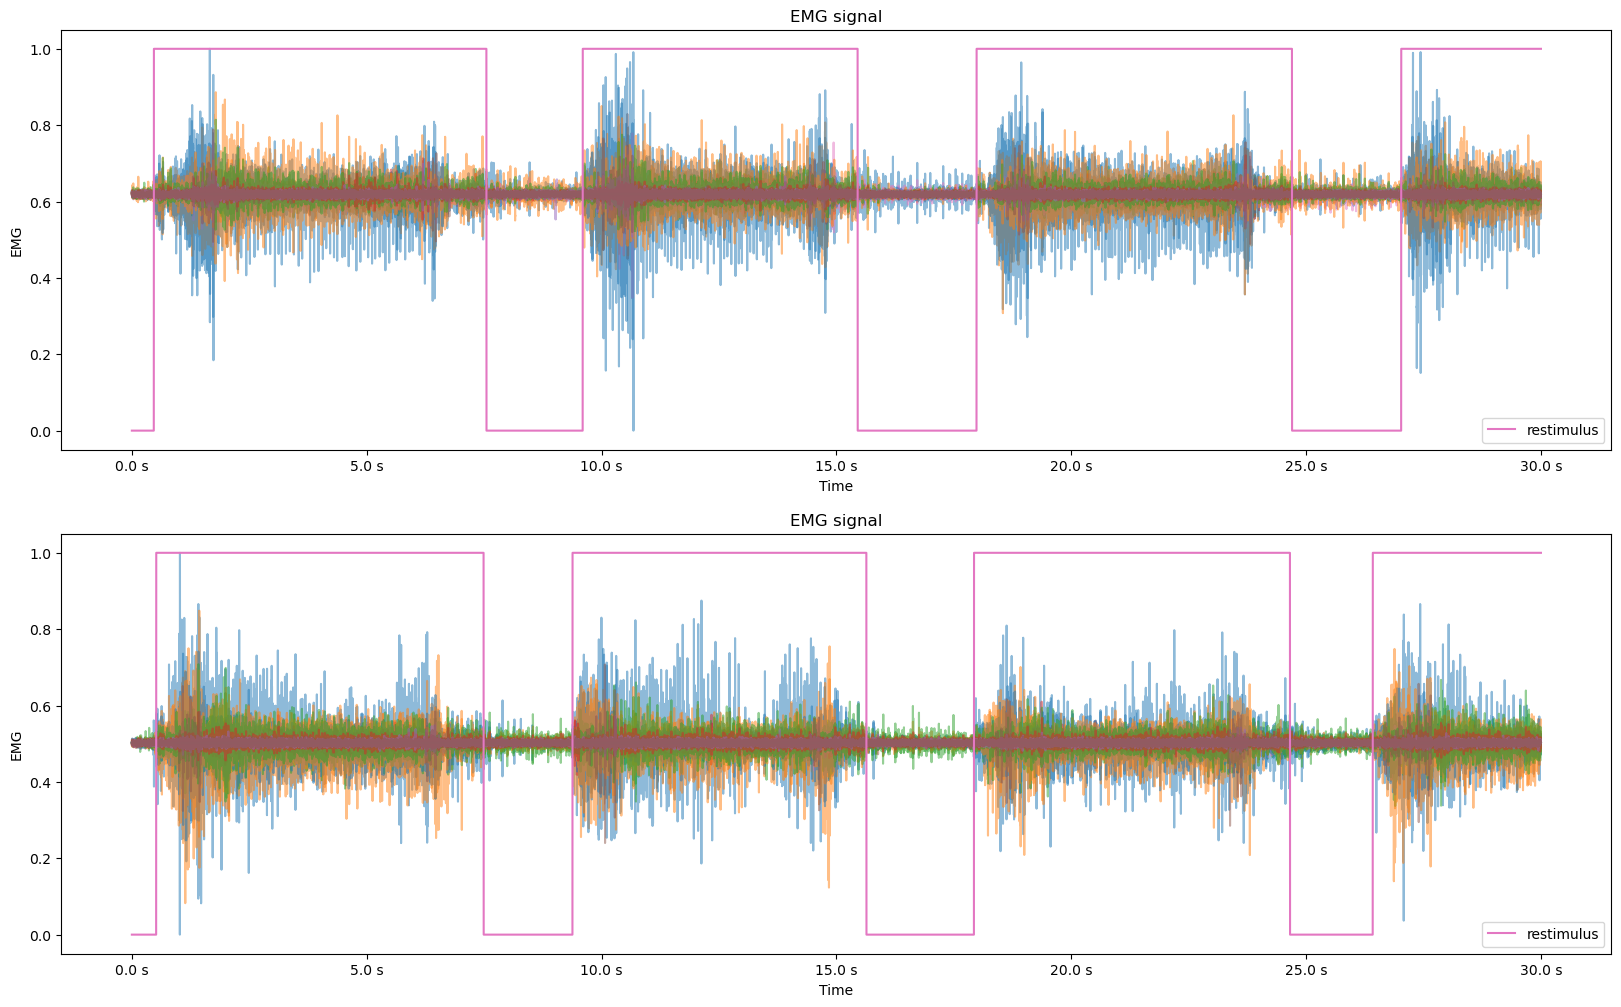

In [10]:
# plot different times same day

mat1 = load_mat('../../data/01_raw/DB6_s1_a/S1_D1_T1.mat')  # load mat-file
mat2 = load_mat('../../data/01_raw/DB6_s1_a/S1_D1_T2.mat')  # load mat-file

fig, ax = plt.subplots(2, 1, figsize=(20, 12))

plot_signal(mat1['emg'], mat1['restimulus'], t=60_000, ax=ax[0])
plot_signal(mat2['emg'], mat2['restimulus'], t=60_000, ax=ax[1])

plt.show()

/var/folders/vn/89j8g3p55gb71ngxshtbg1r80000gn/T/ipykernel_21451/1043718819.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f"{step / 2000:.1f} s" for step in ax.get_xticks()])


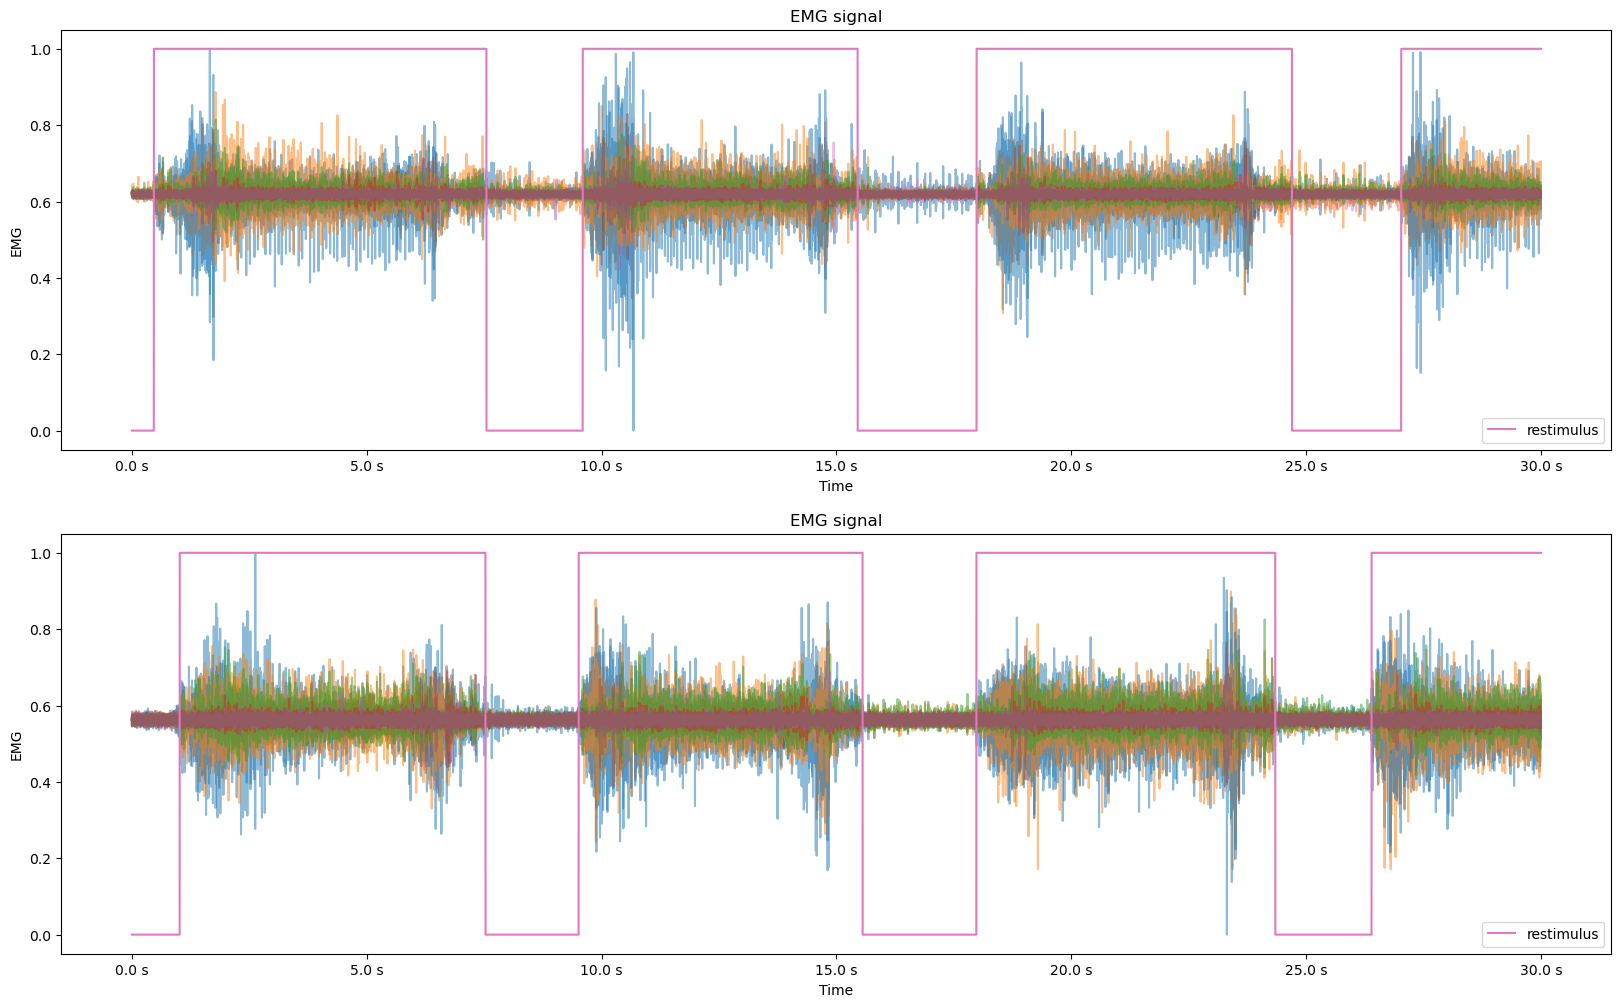

In [11]:
# plot different days same subject

mat1 = load_mat('../../data/01_raw/DB6_s1_a/S1_D1_T1.mat')  # load mat-file
mat2 = load_mat('../../data/01_raw/DB6_s1_a/S1_D2_T1.mat')  # load mat-file

fig, ax = plt.subplots(2, 1, figsize=(20, 12))

plot_signal(mat1['emg'], mat1['restimulus'], t=60_000, ax=ax[0])
plot_signal(mat2['emg'], mat2['restimulus'], t=60_000, ax=ax[1])

plt.show()

/var/folders/vn/89j8g3p55gb71ngxshtbg1r80000gn/T/ipykernel_21451/1043718819.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f"{step / 2000:.1f} s" for step in ax.get_xticks()])


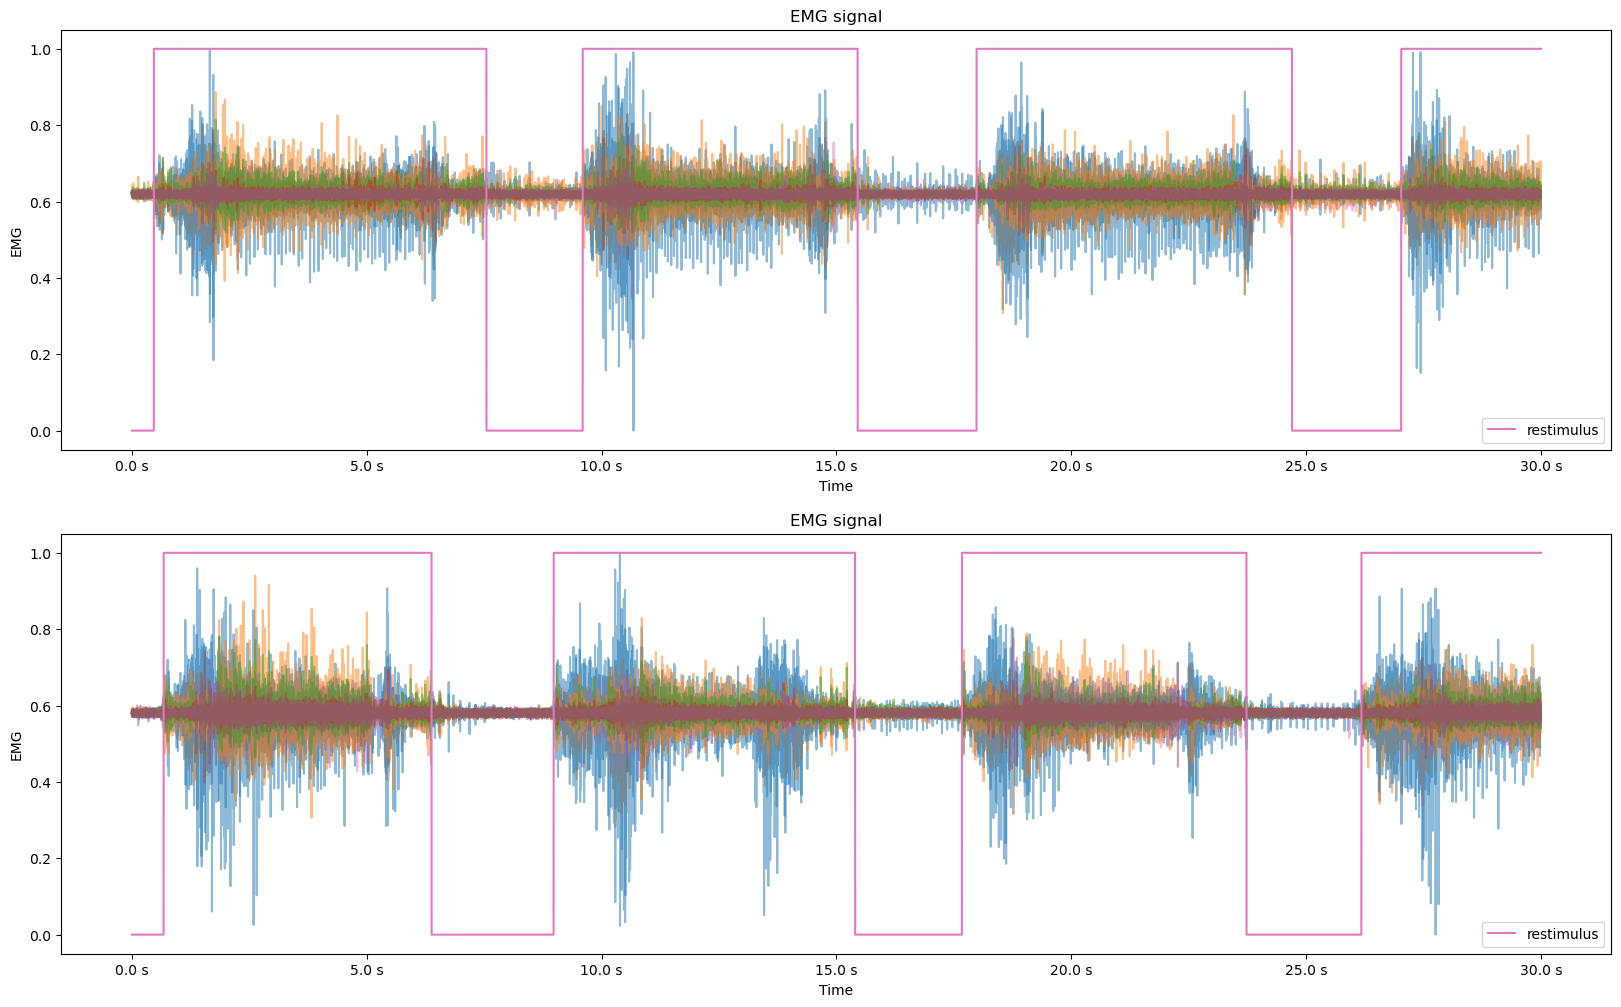

In [26]:
# plot same session different activity

mat1 = load_mat('../../data/01_raw/DB6_s1_a/S1_D1_T1.mat')  # load mat-file

fig, ax = plt.subplots(2, 1, figsize=(20, 12))

# label 1
plot_signal(mat1['emg'], mat1['restimulus'], t=60_000, ax=ax[0]) 

# label 10
plot_signal(mat1['emg'][1_022_000:], mat1['restimulus'][1_022_000:]//10, t=60_000, ax=ax[1]) 

plt.show()

/var/folders/vn/89j8g3p55gb71ngxshtbg1r80000gn/T/ipykernel_21451/1043718819.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f"{step / 2000:.1f} s" for step in ax.get_xticks()])


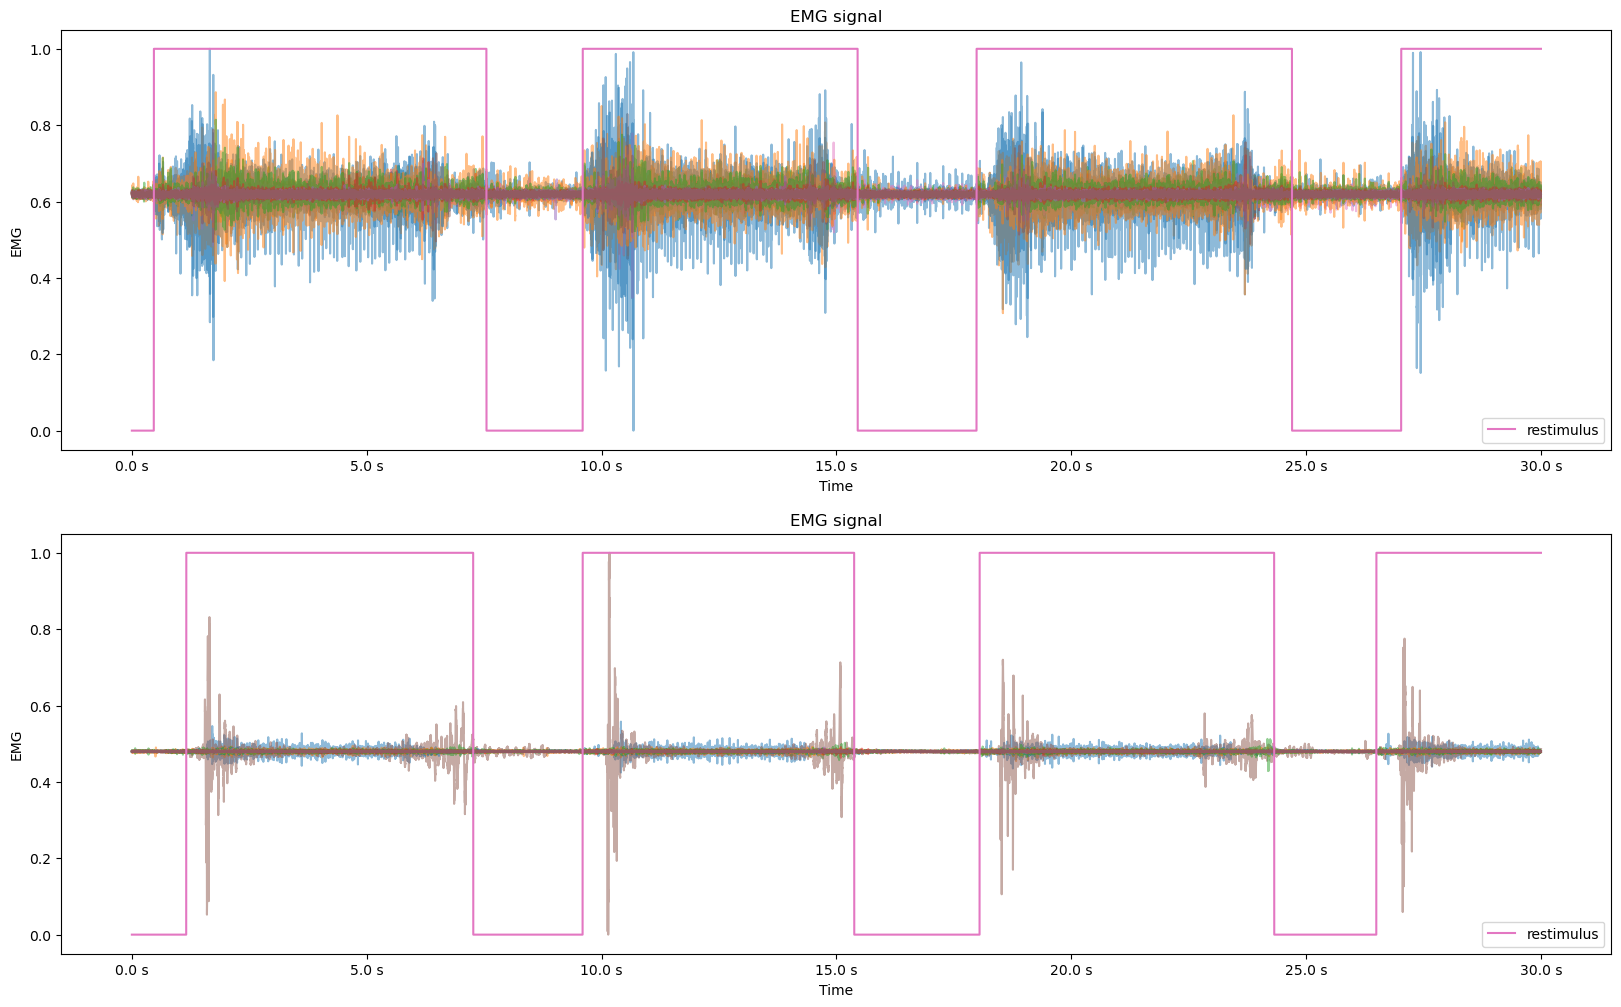

In [27]:
# same time different subjects

mat1 = load_mat('../../data/01_raw/DB6_s1_a/S1_D1_T1.mat')  # load mat-file
mat2 = load_mat('../../data/01_raw/DB6_s2_a/S2_D1_T1.mat')  # load mat-file

fig, ax = plt.subplots(2, 1, figsize=(20, 12))

plot_signal(mat1['emg'], mat1['restimulus'], t=60_000, ax=ax[0])
plot_signal(mat2['emg'], mat2['restimulus'], t=60_000, ax=ax[1])

plt.show()

Found 85 consecutive sequences of 0s


/var/folders/vn/89j8g3p55gb71ngxshtbg1r80000gn/T/ipykernel_21451/1281340494.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f"{step / 2000:.1f} s" for step in ax.get_xticks()])


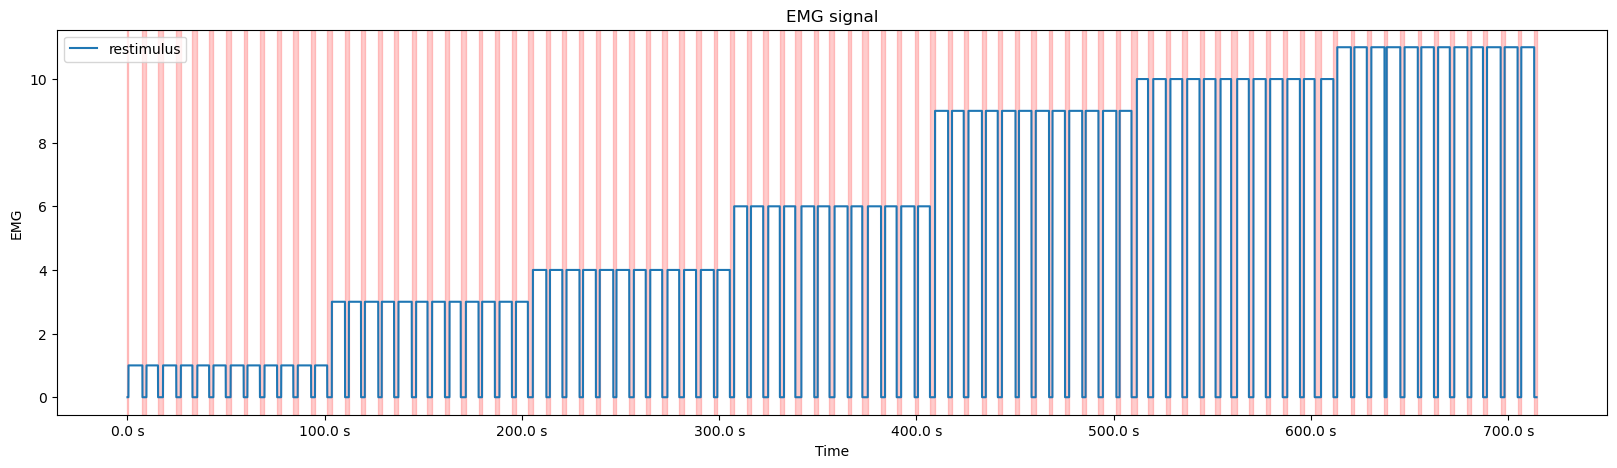

In [28]:
# find shortest consecutive sequence of 0s

def find_zeros(arr):
    zeros = np.where(arr == 0)[0]
    diff = np.diff(zeros)
    idx = np.where(diff > 1)[0]
    start = np.append(zeros[0], zeros[idx + 1])
    end = np.append(zeros[idx], zeros[-1])
    return start, end

start, end = find_zeros(restimulus[:, 0])

print(f'Found {len(start)} consecutive sequences of 0s')

# plot consecutive sequences of 0s

fig, ax = plt.subplots(1, 1, figsize=(20, 5))

ax.plot(restimulus, label='restimulus')

for s, e in zip(start, end):
    ax.axvspan(s, e, alpha=0.2, color='red')

ax.set_xticklabels([f"{step / 2000:.1f} s" for step in ax.get_xticks()])
ax.set_xlabel('Time')
ax.set_ylabel('EMG')
ax.set_title('EMG signal')

ax.legend()
plt.show()

In [29]:
lengths = [e - s for s, e in zip(start, end)]
np.min(lengths)

934